**TASK-2 :  MOVIE RATING PREDICTION**
       
       Author : Shilu Pradhan

       Domain : Data Science

       Aim : To buid a model that predicts the rating of a movie based on features like Votes,Duration and actors
    

In [29]:
#imported all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#import warnings
import warnings
warnings.filterwarnings("ignore")


DOWNLOADING DATASETS

In [30]:
dataset= pd.read_csv("C:\\Users\\shilu\\OneDrive\\Desktop\\IMDb Movies India.csv",encoding='unicode_escape')
dataset.head()

,Name,Year,Duration(min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           15509 non-null  object 
 1   Year           14981 non-null  float64
 2   Duration(min)  7240 non-null   float64
 3   Genre          13632 non-null  object 
 4   Rating         7919 non-null   float64
 5   Votes          7920 non-null   object 
 6   Director       14984 non-null  object 
 7   Actor 1        13892 non-null  object 
 8   Actor 2        13125 non-null  object 
 9   Actor 3        12365 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [32]:
dataset.describe()

,Year,Duration(min),Rating
count,14981.000000,7240.000000,7919.000000
mean,-1987.012215,128.126519,5.841621
std,25.416689,28.912724,1.381777
min,-2022.000000,2.000000,1.100000
25%,-2009.000000,110.000000,4.900000
50%,-1991.000000,131.000000,6.000000
75%,-1968.000000,147.000000,6.800000
max,-1913.000000,321.000000,10.000000


In [33]:
shape = dataset.shape
print(f"Number of rowa:{shape[0]},Number of columns:{shape[1]}")


Number of rowa:15509,Number of columns:10


In [34]:
unique_genres = dataset["Genre"].unique()
print("unique_genres:",unique_genres)

unique_genres: ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family,

In [35]:
rating_dist = dataset["Rating"].value_counts
print("Rating Distribution:\n",rating_dist)

Rating Distribution:
 <bound method IndexOpsMixin.value_counts of 0        NaN
1        7.0
2        NaN
3        4.4
4        NaN
        ... 
15504    4.6
15505    4.5
15506    NaN
15507    NaN
15508    6.2
Name: Rating, Length: 15509, dtype: float64>


In [36]:
dataset.drop_duplicates(inplace=True)

In [37]:
attributes=["Name","Year","Duration(min)","Votes","Rating"]
dataset.dropna(subset=attributes,inplace=True)
missing_val =dataset.isna().sum()
print(missing_val)

Name               0
Year               0
Duration(min)      0
Genre             31
Rating             0
Votes              0
Director           1
Actor 1           75
Actor 2          117
Actor 3          163
dtype: int64


In [38]:
dataset.head()

,Name,Year,Duration(min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [39]:
movie_name_rating = dataset[["Name","Rating"]]
print(movie_name_rating)

                                     Name  Rating
1      #Gadhvi (He thought he was Gandhi)     7.0
3                                 #Yaaram     4.4
5                    ...Aur Pyaar Ho Gaya     4.7
6                               ...Yahaan     7.4
8                      ?: A Question Mark     5.6
...                                   ...     ...
15493                              Zubaan     6.1
15494                            Zubeidaa     6.2
15503                     Zulm Ki Zanjeer     5.8
15505                               Zulmi     4.5
15508                        Zulm-O-Sitam     6.2

[5851 rows x 2 columns]


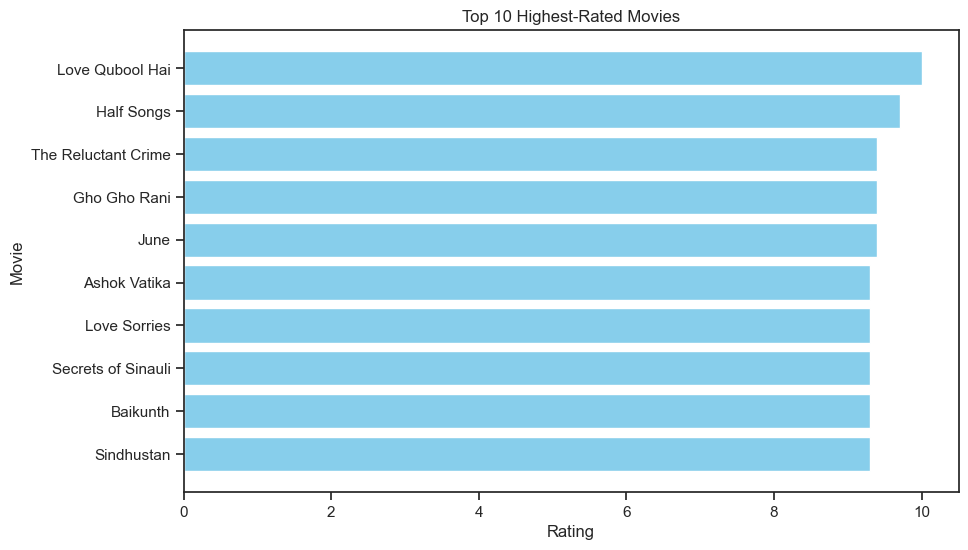

In [40]:
top_rated_movies=dataset.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_rated_movies['Name'],top_rated_movies['Rating'],color = "skyblue")
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title("Top 10 Highest-Rated Movies")
plt.gca().invert_yaxis()
plt.show()

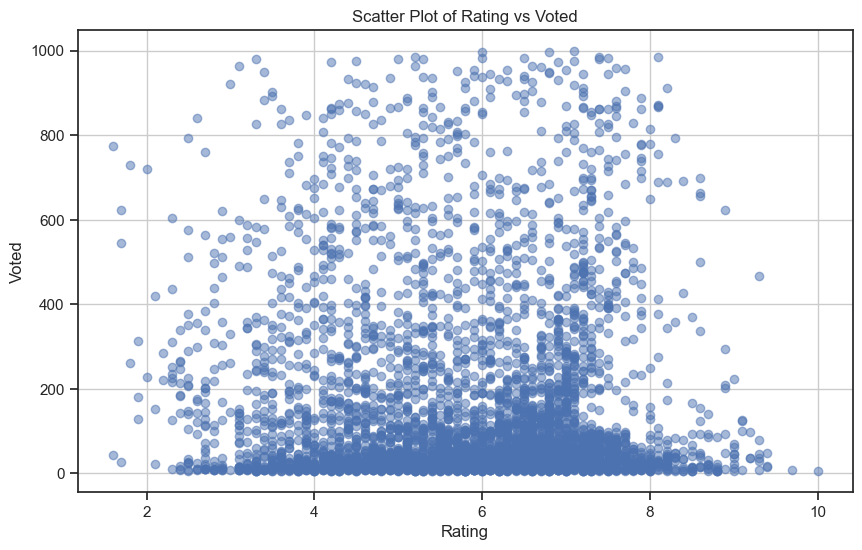

In [41]:
dataset['Votes'] = pd.to_numeric(dataset['Votes'],errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(dataset['Rating'],dataset['Votes'],alpha = 0.5,color='b')
plt.xlabel('Rating')
plt.ylabel('Voted')
plt.title('Scatter Plot of Rating vs Voted')
plt.grid(True)
plt.show()

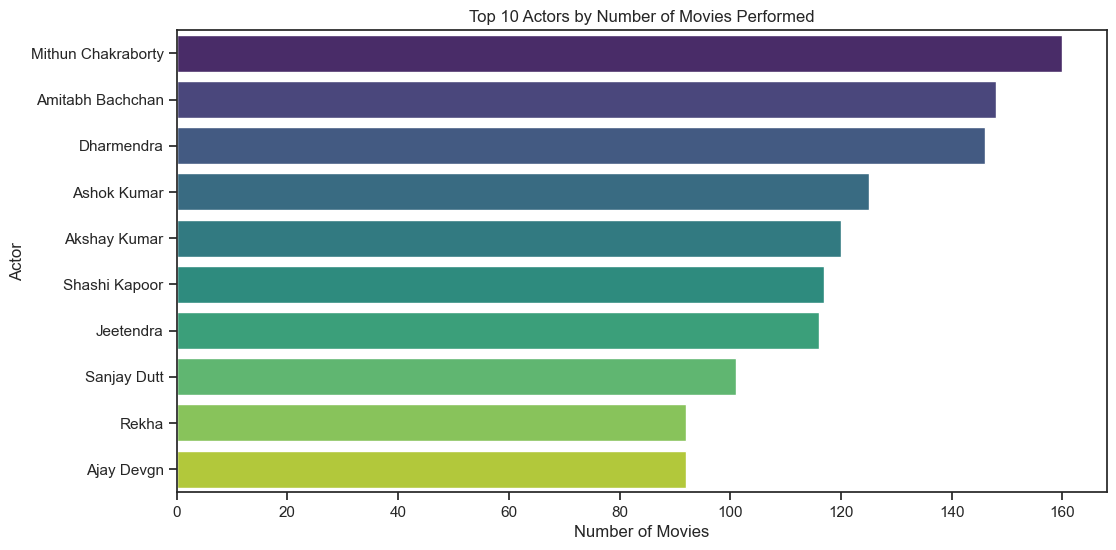

In [42]:
actors = pd.concat([dataset["Actor 1"],dataset["Actor 2"],dataset["Actor 3"]])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns = ['Actor','Number of Movies']
plt.figure(figsize = (12,6))
sea.barplot(x='Number of Movies',y='Actor',data = actor_counts.head(10),palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()


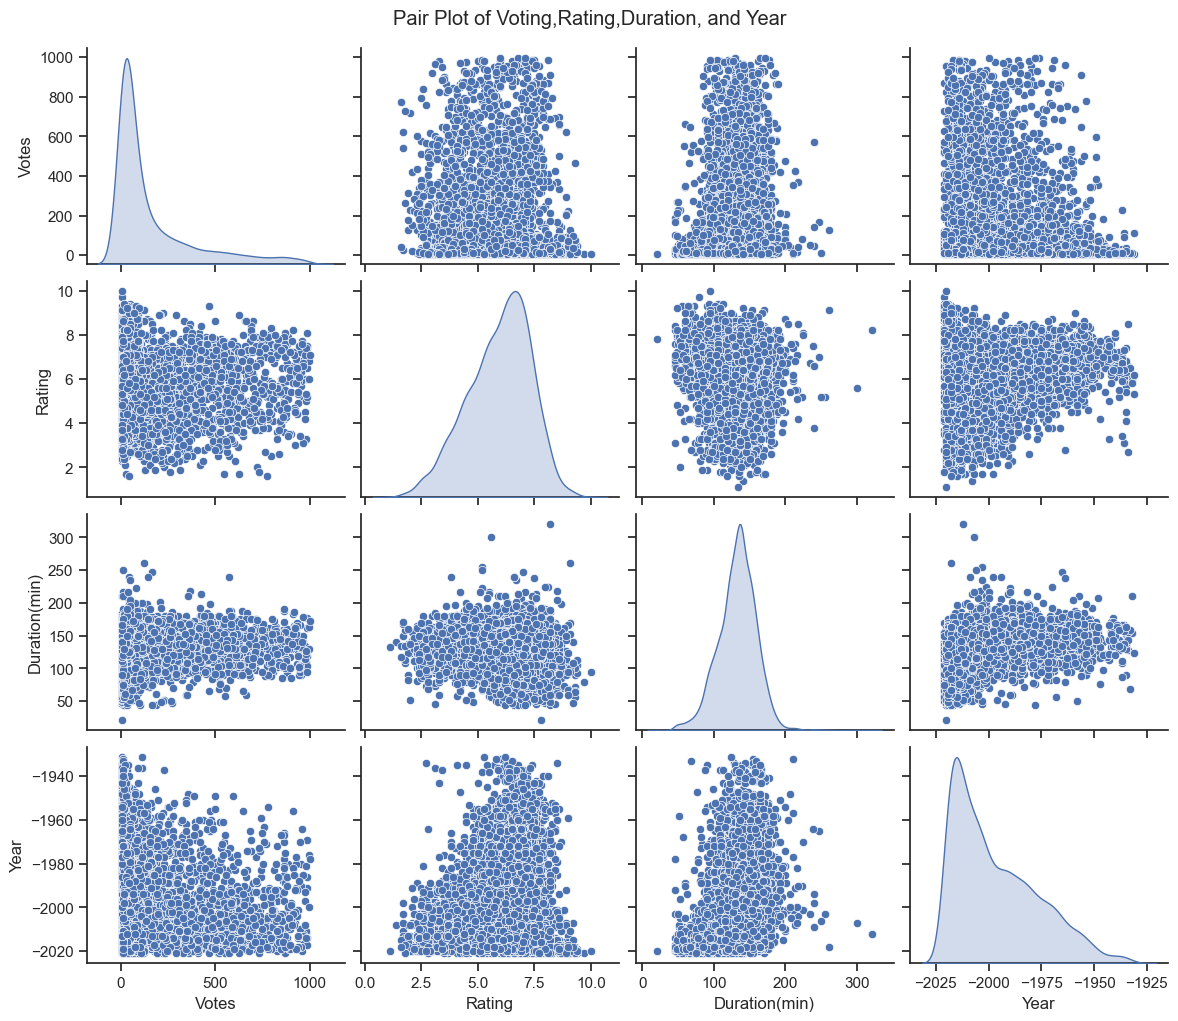

In [44]:
columns_of_interest = ['Votes','Rating','Duration(min)','Year']
sea.set(style = 'ticks')
sea.pairplot(dataset[columns_of_interest],diag_kind='kde',markers = 'o',palette='viridis',height=2.5,aspect=1.2)
plt.suptitle('Pair Plot of Voting,Rating,Duration, and Year',y=1.02)
plt.show()


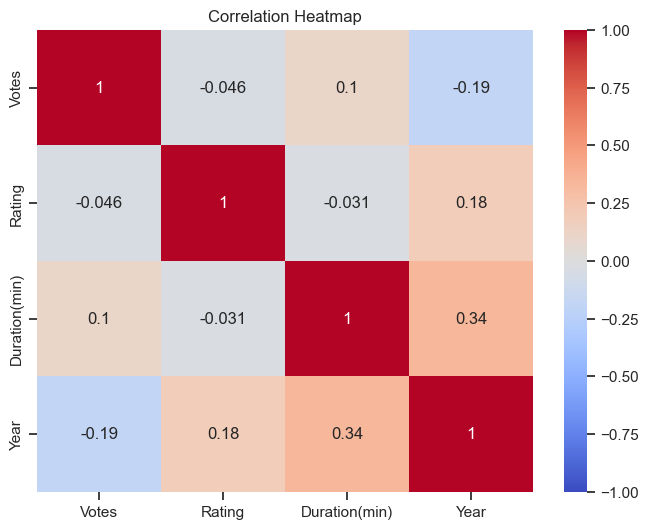

In [45]:
numerical_columns = ['Votes','Rating','Duration(min)','Year']
correlation_matrix = dataset[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sea.heatmap(correlation_matrix,annot= True,cmap ='coolwarm',vmin = -1,vmax =1)
plt.title('Correlation Heatmap')
plt.show()

Feature Engineering

In [48]:
dataset_sorted = dataset.sort_values(by='Votes',ascending=False)
dataset_sorted['Vote_Count_Percentile']=dataset_sorted['Votes'].rank(pct=True)*100
dataset_sorted.reset_index(drop=True,inplace=True)
print(dataset_sorted[['Name','Votes','Vote_Count_Percentile']])

                                      Name  Votes  Vote_Count_Percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.977689
2                              Kurukshetra  996.0              99.955377
3                              Dishkiyaoon  986.0              99.933066
4                               Kadvi Hawa  985.0              99.899598
...                                    ...    ...                    ...
5846                                 Ziddi    NaN                    NaN
5847                        Zila Ghaziabad    NaN                    NaN
5848                                 Zinda    NaN                    NaN
5849              Zindagi Na Milegi Dobara    NaN                    NaN
5850                              Zubeidaa    NaN                    NaN

[5851 rows x 3 columns]


In [49]:
dataset=dataset.dropna(subset=['Votes'])
dataset.head()

,Name,Year,Duration(min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,-2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116.0,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


Model Training and Testing

In [50]:
dataset['Year'] = dataset['Year'].astype(str)
dataset['Duration(min)'] = dataset['Duration(min)'].astype(str)
dataset['Year'] = dataset['Year'].str.extract('(\d+)').astype(float)
dataset['Duration(min)'] = dataset['Duration(min)'].str.extract('(\d+)').astype(float)
x = dataset[['Year','Duration(min)','Votes']]
y = dataset['Rating']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
model = LinearRegression()

In [52]:
model.fit(x_train,y_train)

LinearRegression()

In [53]:
y_pred =model.predict(x_test)

In [54]:
mae = mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
r2 = r2_score(y_test,y_pred)
print(mae)
print(rmse)
print(r2)

1.0848311387601355
1.3484226346477912
0.0981216384029091


Prediction in Visualization for Better Understanding

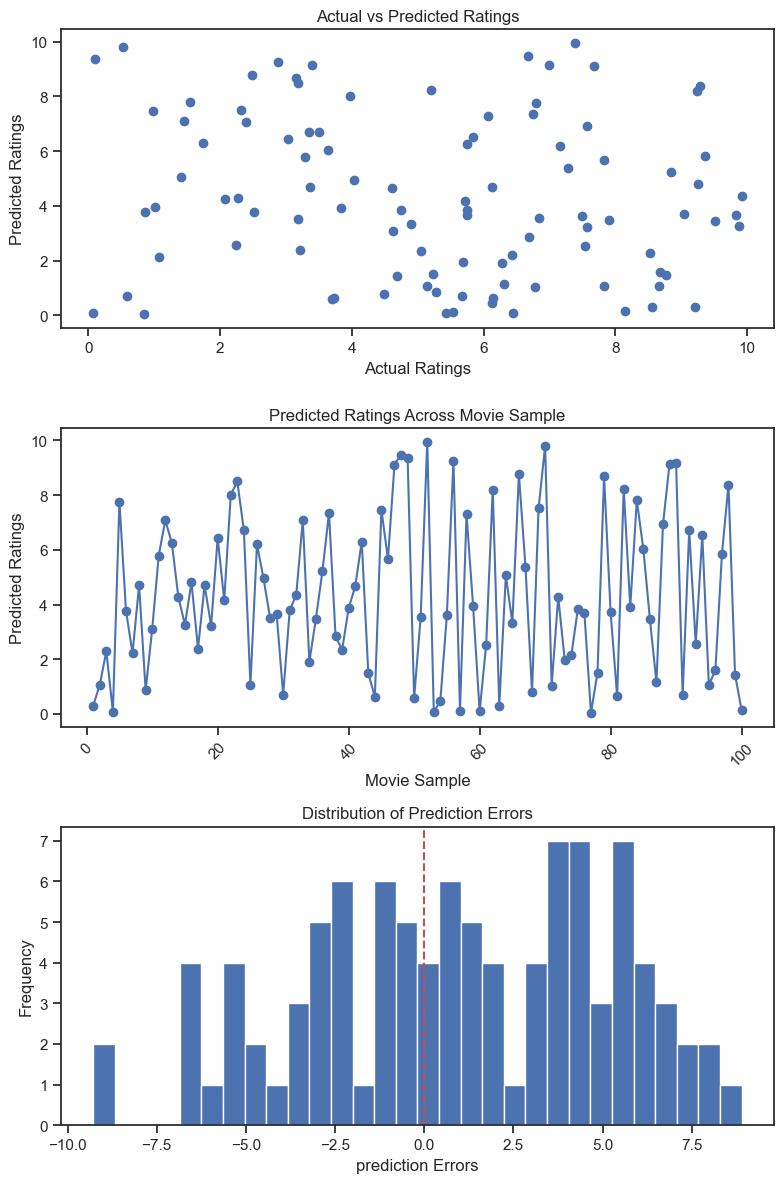

In [59]:
y_test = np.random.rand(100)*10 #actual rating
y_pred=np.random.rand(100)*10 #prediction rating
errors = y_test - y_pred
fig,axs = plt.subplots(3,1,figsize =(8,12))


axs[0].scatter(y_test,y_pred)
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Actual vs Predicted Ratings")

#line Plot
movie_samples = np.arange(1,len(y_pred)+1)
axs[1].plot(movie_samples,y_pred,marker="o",linestyle='-')
axs[1].set_xlabel("Movie Sample")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_title("Predicted Ratings Across Movie Sample")
axs[1].tick_params(axis = 'x',rotation = 45)

#Histogram
axs[2].hist(errors,bins=30)
axs[2].set_xlabel("prediction Errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Prediction Errors")
axs[2].axvline(x=0,color='r',linestyle='--')
plt.tight_layout()
plt.show()